<a href="https://colab.research.google.com/github/bgohrani/Machine_Learning_Basics/blob/main/6.%20Dimensionality_Reduction_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, silhouette_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

import tensorflow as tf
import keras

#Importing essential Libraries

# 1. Dimensionality Reduction

In [ ]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()  
X_train_reshaped = X_train.reshape(X_train.shape[0],-1)
X_test_reshaped = X_test.reshape(X_test.shape[0],-1)

#Loading MNIST data for training 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
pca = PCA()
pca.fit_transform(X_train_reshaped)
cum_sum = np.cumsum(pca.explained_variance_ratio_)

#Dimensionality Reduction can make training problems simpler and help with faster learning
#One such method to dimensionality reduction is to use the Principal Component Analysis algorithm
#It identifies the hyperplane nearest to the dataset and projects the data onto it, reducing its dimensions
#We want to see how well we can capture the variance of the dataset once we have reduced its dimensions
#For this we can use the explained variance ratio, which shows how much variance is captured with each dimension of the data
#We need to take the cumulative sum of this data and visualize it for which we use np.cumsum

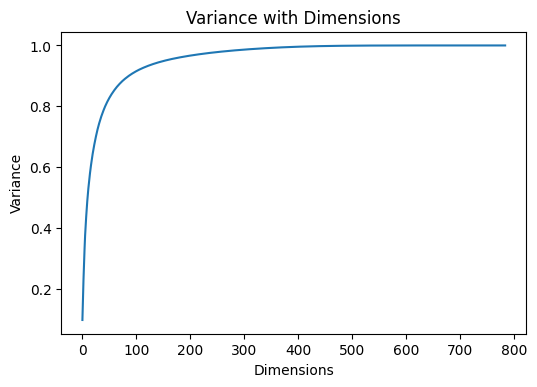

In [ ]:
plt.figure(dpi=100)
plt.plot(cum_sum)
plt.title('Variance with Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Variance')
plt.show()

#Visualizing the behaviour of the variance with increase in dimensions

In [ ]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_reshaped)
print(X_train_reduced.shape)

#We want to lower the dimensions of the data such that we can preserve as much variance
#We can set the n_components feature to the percentage we want and then see the shape of the transformed data

(60000, 154)


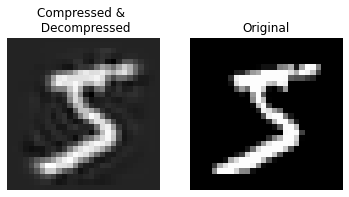

In [ ]:
X_train_decompressed = pca.inverse_transform(X_train_reduced)
plt.subplot(1,2,1)
plt.gray()
plt.imshow(X_train_decompressed[0].reshape(28,28))
plt.title('Compressed & \n Decompressed')
plt.axis('Off')


plt.subplot(1,2,2)
plt.gray()
plt.imshow(X_train[0])
plt.title('Original')
plt.axis('off')
plt.show()

#Here we wish to see how the transformation actions modify the images
#We first compress and the decompress the image, and plot it next to the original to compare

In [ ]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.split(X_train_reshaped,n_batches):
  inc_pca.partial_fit(X_batch)

X_train_reshaped_transformed = inc_pca.transform(X_train_reshaped)

#If we are working with large datasets, we can also fit the data partially, in batches
#We have to use partial_fit for the same and then once the loop is run over all the batches, we can transform the entire dataset

In [ ]:
swiss_roll_data, swiss_roll_targets = sklearn.datasets.make_swiss_roll(n_samples=5000)

#We will use the popular dataset, the Swiss roll dataset for training

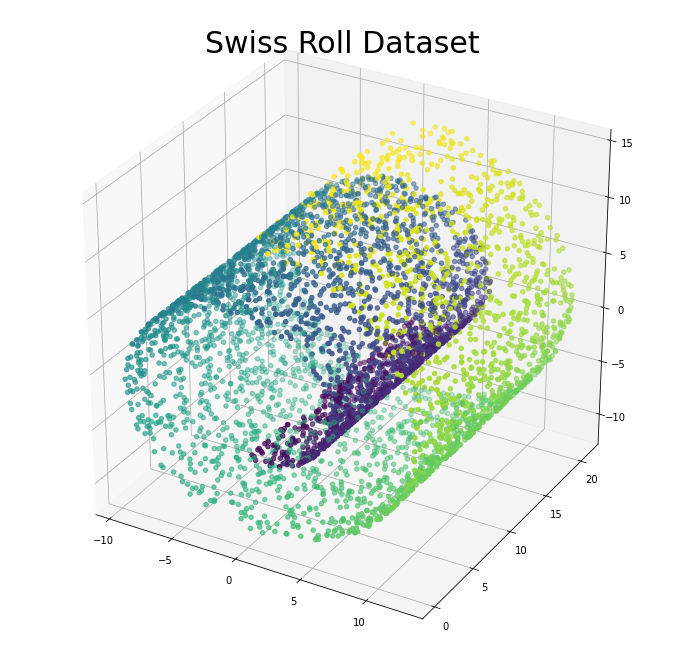

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection = '3d')

ax.scatter(swiss_roll_data[:,0],swiss_roll_data[:,1],swiss_roll_data[:,2],c=swiss_roll_targets, cmap='viridis')
plt.title('Swiss Roll Dataset', fontsize=30)
plt.show()

#Visualizing our dataset

In [ ]:
linear_pca = KernelPCA(n_components=2, kernel='linear')
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid')
swiss_roll_data_transformed_linear = linear_pca.fit_transform(swiss_roll_data)
swiss_roll_data_transformed_rbf = rbf_pca.fit_transform(swiss_roll_data)
swiss_roll_data_transformed_sigmoid = sig_pca.fit_transform(swiss_roll_data)


#One more method used earlier while making decision boundaries was using kernels, wherein non-linear data becomes Linear when mapped to higher dimensions
#The same logic can be used here in reverse, where data in higher dimensions can be mapped to lower dimensions with an increase in non-linearity
#Three kernels are chosen here, rbf, linear and sigmoid, wherein the dimensions of the swiss roll are reduced to 2

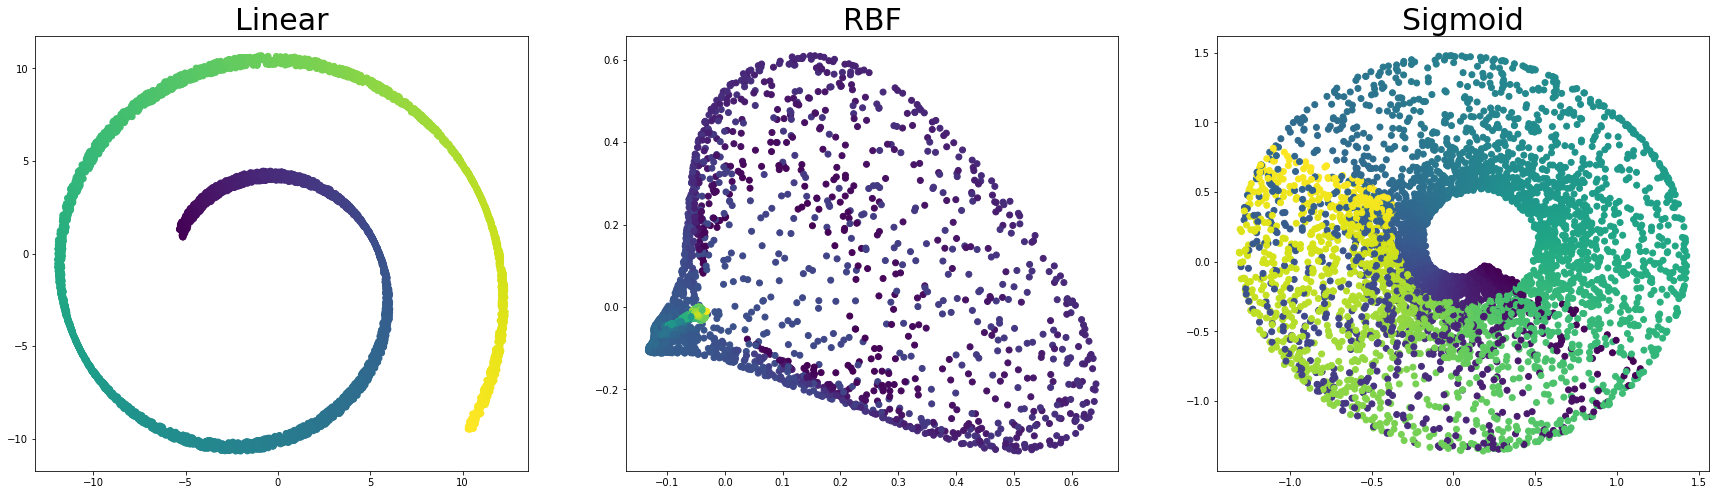

In [ ]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.scatter(swiss_roll_data_transformed_linear[:,0], swiss_roll_data_transformed_linear[:,1],c=swiss_roll_targets,cmap='viridis')
plt.title('Linear', fontsize=30)

plt.subplot(1,3,2)
plt.scatter(swiss_roll_data_transformed_rbf[:,0], swiss_roll_data_transformed_rbf[:,1],c=swiss_roll_targets,cmap='viridis')
plt.title('RBF', fontsize=30)

plt.subplot(1,3,3)
plt.scatter(swiss_roll_data_transformed_sigmoid[:,0], swiss_roll_data_transformed_sigmoid[:,1],c=swiss_roll_targets,cmap='viridis')
plt.title('Sigmoid', fontsize=30)

plt.show()

#The results of each of the kernels are visualized with the help of subplots below

In [ ]:
clf_pipeline = Pipeline([
                         ('kpca', KernelPCA(n_components=2)),
                         ('tree_reg', DecisionTreeRegressor())
])

param_grid = [{
    "kpca__gamma":  np.linspace(0.03,0.05,10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3)
grid_search.fit(swiss_roll_data,swiss_roll_targets)

#Now, we wish to find out what are the best parameters for regression on the given dataset
#We use grid search for this and choose amongs the values of gamma for 2 kernels, rbf and sigmoid
#We can use best_params_ for checking the results

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('tree_reg', DecisionTreeRegressor())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
print(grid_search.best_params_)

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


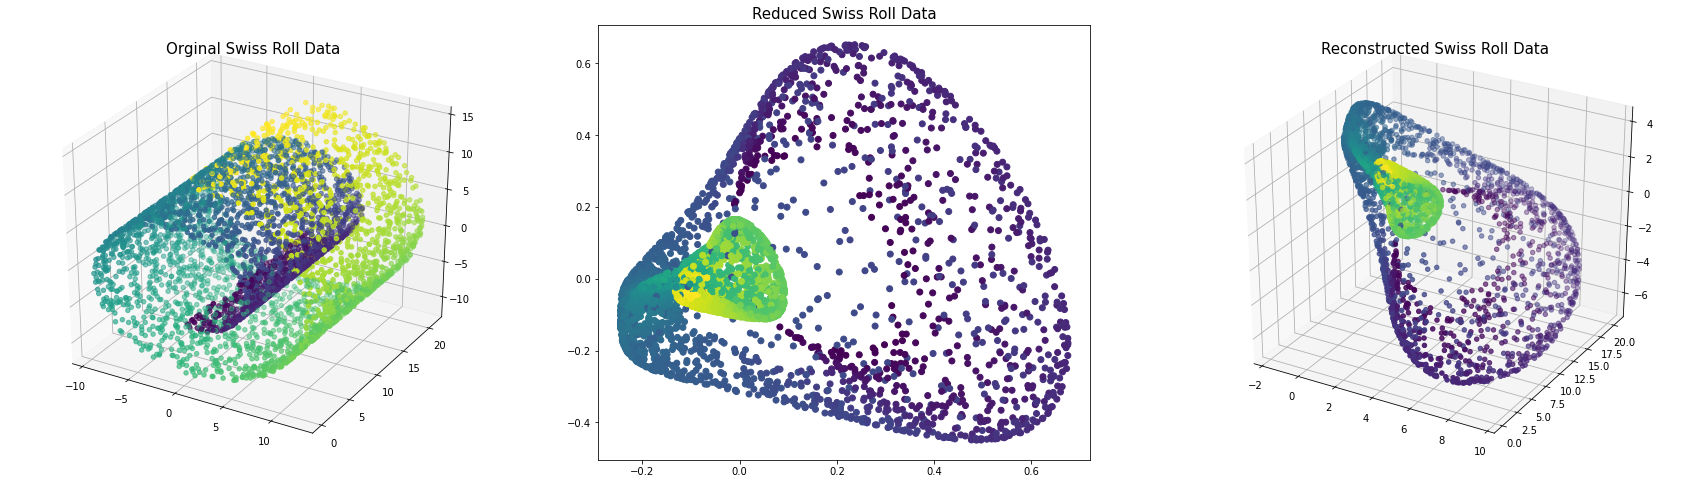

In [ ]:
rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.0455,fit_inverse_transform=True)
swiss_roll_data_transformed =  rbf_pca.fit_transform(swiss_roll_data)
fig = plt.figure(figsize=(30,8))

swiss_roll_data_inverse_transformed = rbf_pca.inverse_transform(swiss_roll_data_transformed)

ax = fig.add_subplot(1,3,1,projection='3d')
ax.scatter3D(swiss_roll_data[:,0],swiss_roll_data[:,1], swiss_roll_data[:,2], c=swiss_roll_targets, cmap='viridis')
plt.title('Orginal Swiss Roll Data',fontsize=15)

ax = fig.add_subplot(1,3,2)
ax.scatter(swiss_roll_data_transformed[:,0],swiss_roll_data_transformed[:,1],c=swiss_roll_targets,cmap='viridis')
plt.title('Reduced Swiss Roll Data',fontsize=15)

ax = fig.add_subplot(1,3,3,projection='3d')
ax.scatter3D(swiss_roll_data_inverse_transformed[:,0],swiss_roll_data_inverse_transformed[:,1],swiss_roll_data_inverse_transformed[:,2],c=swiss_roll_targets, cmap='viridis')
plt.title('Reconstructed Swiss Roll Data',fontsize=15)
plt.show()


#One approach in Dimensionality reduction is to use the model which yields the lowest reconstruction error, that is the lowest difference in the inverted transformation
#This is difficult in rbf however, because the data is mapped to an infinitely large space and then projected and the reconstructed point cannot be constructed
#We can however make a reconstruction pre image, that would map close to the original data, and minimize this error
#The subplots help in visualizing this

In [ ]:
lle_red = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
swiss_roll_data_transformed = lle_red.fit_transform(swiss_roll_data)

#Locally Linear Embedding is another dimensionality reduction technique
#It works by seeing how each instance linearly relates to its closest neighbours
#Then lower dimensional representations are determined that best preserve these relations
#We can study local linear embedding for our swiss roll dataset

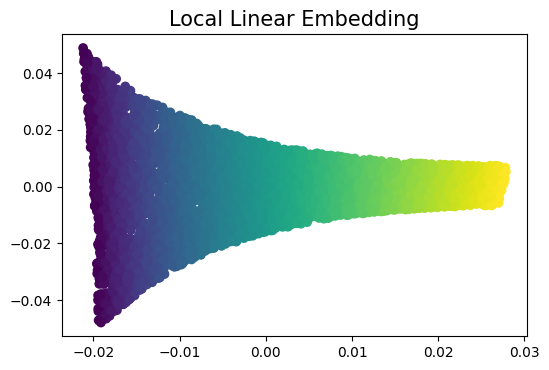

In [ ]:
plt.figure(dpi=100)
plt.scatter(swiss_roll_data_transformed[:,0],swiss_roll_data_transformed[:,1],c=swiss_roll_targets,cmap='viridis')
plt.title('Local Linear Embedding', fontsize= 15)

plt.show()

#Visualizing the transformed dataset

# 2. Unsupervised Learning

In [10]:
blob_data, blob_targets = sklearn.datasets.make_blobs(n_samples = 500, n_features=2, centers=5, random_state=18)

#Creating blob data for clustering
#In clustering, the instances without their labels are grouped into clusters
#Clusters can be useful for data analysis, customer segmentation, recommender systems,
#search engines, image segmentation, semi-supervised learning, dimensionality
#reduction etc.

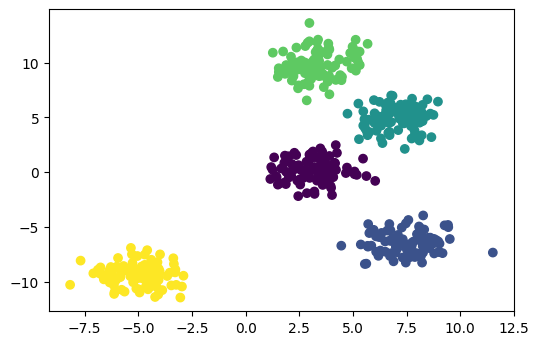

In [11]:
plt.figure(dpi=100)
plt.scatter(blob_data[:,0], blob_data[:,1], c=blob_targets, cmap='viridis')
plt.show()

#Visualizing

In [12]:
kmeans = KMeans(n_clusters=5)
Y_pred = kmeans.fit_predict(blob_data)

#One of the algorithms we can use for clustering is the kmeans algorithm
#Given some data, it randomly assigns clusters, then computes the distance from the points and reassigns and so on
#This is carried on until the solution begins to converge

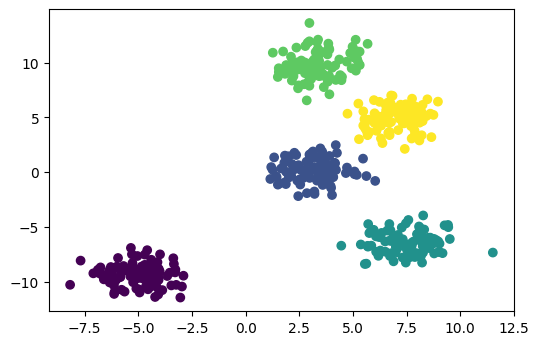

In [13]:
plt.figure(dpi=100)
plt.scatter(blob_data[:,0], blob_data[:,1], c=Y_pred, cmap='viridis')
plt.show()

#We can see the clusters the algorithm has found 

In [17]:
X = np.linspace(-10,13,1000)
Y = np.linspace(-15,15,1000)
XX,YY = np.meshgrid(X,Y)

#We can also make contour plots like before, creating a dataset of a 2D grid

In [18]:
contour_X = np.c_[XX.reshape(-1,1),YY.reshape(-1,1)]
Y_contour_pred = kmeans.predict(contour_X)

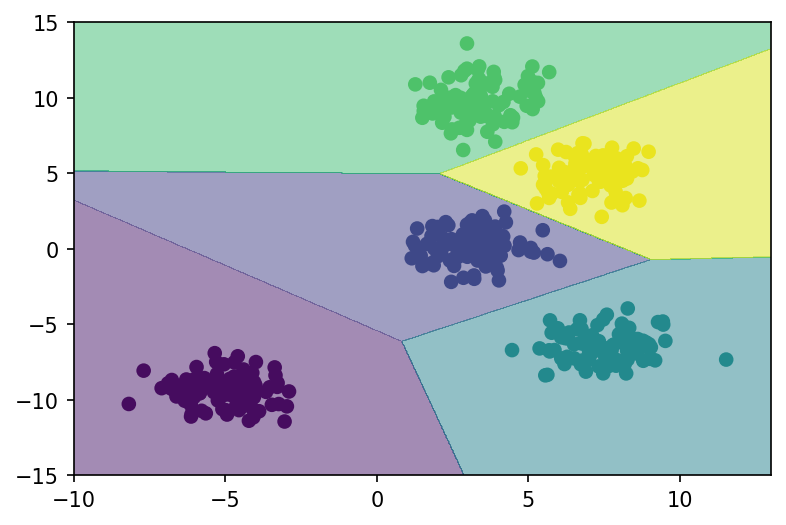

In [19]:
plt.figure(dpi=150)
plt.scatter(blob_data[:,0], blob_data[:,1], c=Y_pred, cmap='viridis')
plt.contourf(XX,YY,Y_contour_pred.reshape(1000,1000), cmap='viridis', alpha=0.5)
plt.show()

#Visualizing our result

In [ ]:
inertia_regular = []
inertia_batched = []

for i in range(1,100,1):
  kmeans_regular = KMeans(n_clusters=i)
  kmeans_mini = MiniBatchKMeans(n_clusters=i)
  kmeans_regular.fit(blob_data,blob_targets)
  kmeans_mini.fit(blob_data,blob_targets)
  inertia_regular.append(kmeans_regular.inertia_)
  inertia_batched.append(kmeans_mini.inertia_)

#One way of determining the best position of the centroids is by using a method called inertia
#Inertia is the squared distance between each point and its nearest centroid
#We can run the model n times with different initializations and store the one whose inertia is the least
#When we are dealing with large datasets, we can use the MiniBatchKmeans for faster training
#Inertia can get slightly worse as shown in the following visualization

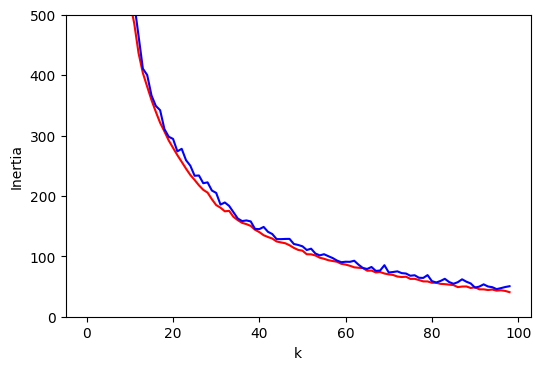

In [ ]:
plt.figure(dpi=100)
plt.plot(inertia_regular,'r')
plt.plot(inertia_batched,'b')
plt.ylim(0,500)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [22]:
silhouette_data = []
i_values = []

for i in range(2,8,1):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(blob_data,blob_targets)
  silhouette_data.append(silhouette_score(blob_data, kmeans.labels_))
  i_values.append(i)

#Sometimes we may not know the number of clusters to look for
#Inertia is also not a good metric for the same as it keeps decreasing with increase in k
#We can use silhouette score for the same
#Silhoette score also depends on maximizing the distance between individual clusters and is a better metric

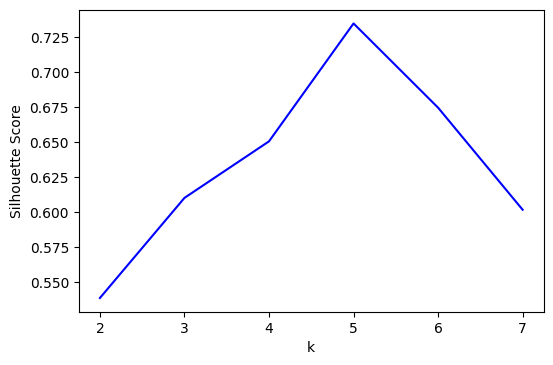

In [23]:
plt.figure(dpi=100)
plt.plot(i_values, silhouette_data,'b')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

#The silhouette score is maximized for 5 clusters, which is infact what we needed 

In [ ]:
digit_data, digit_targets = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(digit_data, digit_targets, stratify=digit_targets)

#We want to see how clustering can help improve accuracy
#We load the digits data from sklearn for this and split it into training and test sets 

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg.score(X_test, Y_test)

#We want to see the baseline accuracy so we use logistic regression for that 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9577777777777777

In [ ]:
cluster_clf = Pipeline([
                        ('kmeans', KMeans(n_clusters=50)),
                        ('log_reg', LogisticRegression())
])

cluster_clf.fit(X_train,Y_train)
cluster_clf.score(X_test,Y_test)

#When we use Kmeans clustering, we are setting up more clusters than needed because each digit can be written in many ways
#We then train this model and observe that we are getting better accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9488888888888889

In [ ]:
cluster_clf = Pipeline([
                        ('kmeans', KMeans(n_clusters=50)),
                        ('log_reg', LogisticRegression())
])

param_grid = [{
    "kmeans__n_clusters":  range(2,100,1)
}]

grid_search = GridSearchCV(cluster_clf, param_grid, cv=3)
grid_search.fit(X_train,Y_train)

#We can also use GridSearchCV to determine the optimal number of clusters, giving it a sample range

In [ ]:
grid_search.best_params_

{'kmeans__n_clusters': 60}

In [ ]:
grid_search.score(X_test,Y_test)

#Evaluating the performance of the model

0.9511111111111111

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train[:50], Y_train[:50])
log_reg.score(X_test,Y_test)

#Having a few labelled instances, we can also use clustering to our benefit 
#We train a simple logistic regression model on a few labelled samples and observe the performance 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8044444444444444

In [ ]:
kmeans = KMeans(n_clusters=50)
X_train_dist_cluster = kmeans.fit_transform(X_train)

representative_image_indices = np.argmin(X_train_dist_cluster, axis=0)
X_representative_images = X_train[representative_image_indices]

#We train a clustering algorithm with 50 clusters and get the distances of each point from all the clusters
#For each cluster we choose a point that is closest to it, to see what numbers has it determined
#We can then visualize these points to see what is closest to all clusters

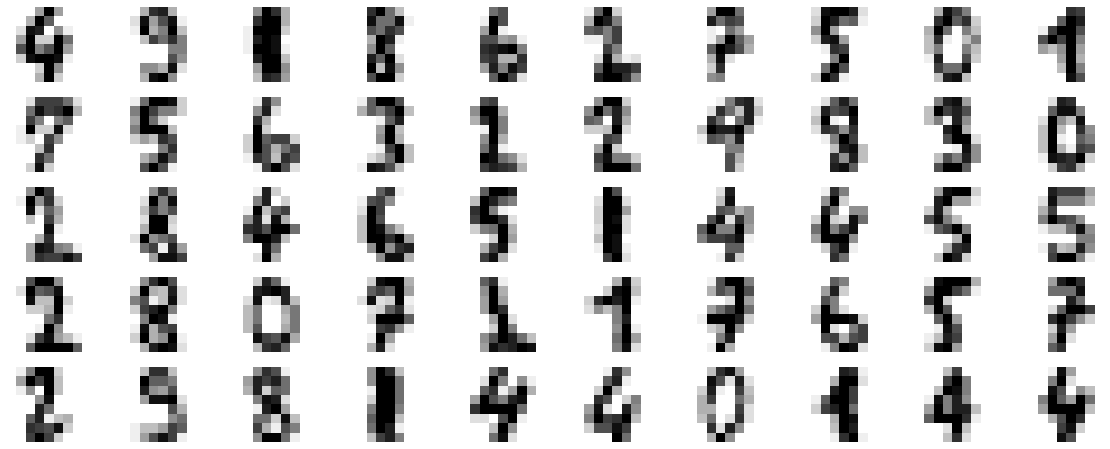

In [ ]:
plt.figure(figsize=(20,8))

for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(X_representative_images[i].reshape(8,8), cmap='binary')
  plt.axis('off')


plt.show()

#For 50 clusters, we are showing the points that are closest to each of them

In [ ]:
Y_representative_images = Y_train[representative_image_indices]

#We can get the labels for each of these points or manually make them

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_images,Y_representative_images)
log_reg.score(X_test,Y_test)

#We use these images and these labels for training the model and get a better performance

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8911111111111111

In [ ]:
X_train_cluster_positions = np.argmin(X_train_dist_cluster, axis = 1)
Y_clusters_labelled = Y_representative_images[X_train_cluster_positions]

#What we want to do next is to give all the elements in one cluster the same label
#The label is the same as the one point that lies closest to the cluster

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_clusters_labelled)
log_reg.score(X_test,Y_test)

#Fitting the model to this larger dataset, we get even better performance

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.92

In [ ]:
cluster_min_distances = [None]*50
cluster_max_distances = [None]*50

for i in range(X_train.shape[0]):
  cluster_belonging_to = kmeans.labels_[i]
  value = X_train_dist_cluster[i][cluster_belonging_to]
  if cluster_min_distances[cluster_belonging_to] == None: 
    cluster_min_distances[cluster_belonging_to] = value
  if cluster_max_distances[cluster_belonging_to] == None: 
    cluster_max_distances[cluster_belonging_to] = value
  
  if value < cluster_min_distances[cluster_belonging_to]: cluster_min_distances[cluster_belonging_to] = value
  if value > cluster_max_distances[cluster_belonging_to]: cluster_max_distances[cluster_belonging_to] = value

#Although we give the same label to all the points in the cluster, we might be making errors because the points lying near to the boundary can be different
#The approach we want to use here is that give the same label only to points which are within 20% to the center of the cluster
#The following code helps us do that, first determining the maximum and minimum distances for each cluster

In [ ]:
X_partially_labelled_list = []
Y_partially_labelled_list = []
i_values = []

for i in range(X_train.shape[0]):
  cluster_belonging_to = kmeans.labels_[i]
  value = X_train_dist_cluster[i][cluster_belonging_to]
  val_to_check = (value - cluster_min_distances[cluster_belonging_to])/(cluster_max_distances[cluster_belonging_to] - cluster_min_distances[cluster_belonging_to])
  if val_to_check <= 0.2: 
    X_partially_labelled_list.append(X_train[i])
    Y_partially_labelled_list.append(Y_train[i])

#Once we have the max and min distances, we go to each point, check its cluster and check the percentage distance from the center
#If this is within 20% we include the point and the cluster label else not

In [ ]:
X_partially_labelled = np.asarray(X_partially_labelled_list)
Y_partially_labelled = np.asarray(Y_partially_labelled_list)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_partially_labelled,Y_partially_labelled)
log_reg.score(X_test,Y_test)

#We then fit the model to this new created dataset and see a small boost in performance

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9288888888888889

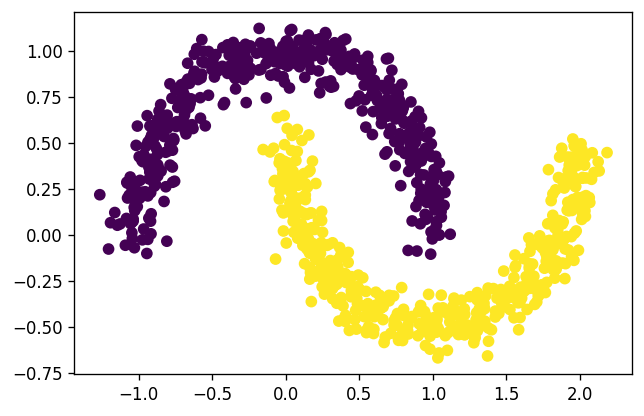

In [ ]:
moons_data, moons_target = sklearn.datasets.make_moons(n_samples = 1000, noise=0.08)
 
plt.figure(dpi=120)
plt.scatter(moons_data[:,0], moons_data[:,1],c=moons_target, cmap= 'viridis')
plt.show()

#Creating moons dataset

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(moons_data)

dbscan_high_E = DBSCAN(eps=0.1, min_samples=5)
dbscan_high_E.fit(moons_data)

#DBSCAN is another algorithm which determines the dense regions within a given dataset
#Continuous chains of dense regions form a cluster
#We can use DBSCAN with two different values of density region size

DBSCAN(eps=0.1)

In [ ]:
def find_data_dbscan(moons_data, dbscan):
  anomaly_data_list = []
  regular_data_list = []
  regular_labels_list = []
  for i in range(dbscan.labels_.shape[0]):
    if dbscan.labels_[i] == -1: 
      anomaly_data_list.append(moons_data[i])
    else:
      regular_data_list.append(moons_data[i])
      regular_labels_list.append(dbscan.labels_[i])  

  anomaly_data = np.asarray(anomaly_data_list)
  regular_data = np.asarray(regular_data_list)
  regular_labels = np.asarray(regular_labels_list)

  return anomaly_data,regular_data,regular_labels

#This function helps to determine the data that belongs to a cluster and the anomalies by checking the labels predicted

In [ ]:
anomaly_data_lowE, regular_data_lowE, regular_labels_lowE = find_data_dbscan(moons_data,dbscan)
anomaly_data_highE, regular_data_highE, regular_labels_highE = find_data_dbscan(moons_data,dbscan_high_E)

#We call this function for both the models created above and visualize the data
#The anomalies are visualized with the help of 'x'

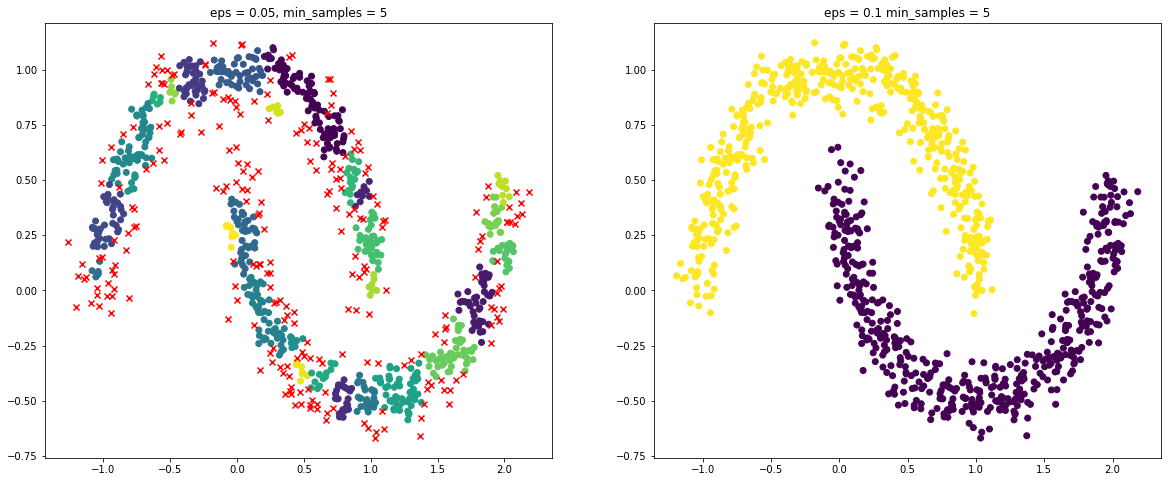

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(regular_data_lowE[:,0], regular_data_lowE[:,1], c = regular_labels_lowE, cmap= 'viridis')
plt.scatter(anomaly_data_lowE[:,0],anomaly_data_lowE[:,1], c = 'r', marker= 'x')
plt.title('eps = 0.05, min_samples = 5')

plt.subplot(1,2,2)
plt.scatter(regular_data_highE[:,0], regular_data_highE[:,1], c = regular_labels_highE, cmap= 'viridis')
#plt.scatter(anomaly_data_highE[:,0],anomaly_data_highE[:,1], c = 'r', marker= 'x')
plt.title('eps = 0.1 min_samples = 5')
plt.show()

#We can infer form here that the eps value of 0.1 is more suited to the data since it forms two clusters with no anomalies
#The small value of epsilon forms many clusters, also leaving out many points as anomalies

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(dbscan_high_E.components_, dbscan_high_E.labels_[dbscan_high_E.core_sample_indices_])

#We can then use KNN classifier to classify the data

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-2,-1],[-0.7,0.25],[1,-0.25],[3,3]])
knn_clf.predict(X_new)

#Prediction on new generated points

array([1, 1, 0, 0])

In [ ]:
Y_dist, Y_pred_index = knn_clf.kneighbors(X_new,n_neighbors=1)

#Sometimes the KNN classifier might not be able to identify anomalies
#We can set a criteria for this

In [ ]:
Y_pred = dbscan_high_E.labels_[dbscan_high_E.core_sample_indices_][Y_pred_index]

#We determine the labels for the points and then check if the threshold distance is crossed
#If it is we make that point an anomaly

In [ ]:
Y_pred[Y_dist > 0.2] = -1
print(Y_pred)

[[-1]
 [ 1]
 [ 0]
 [-1]]


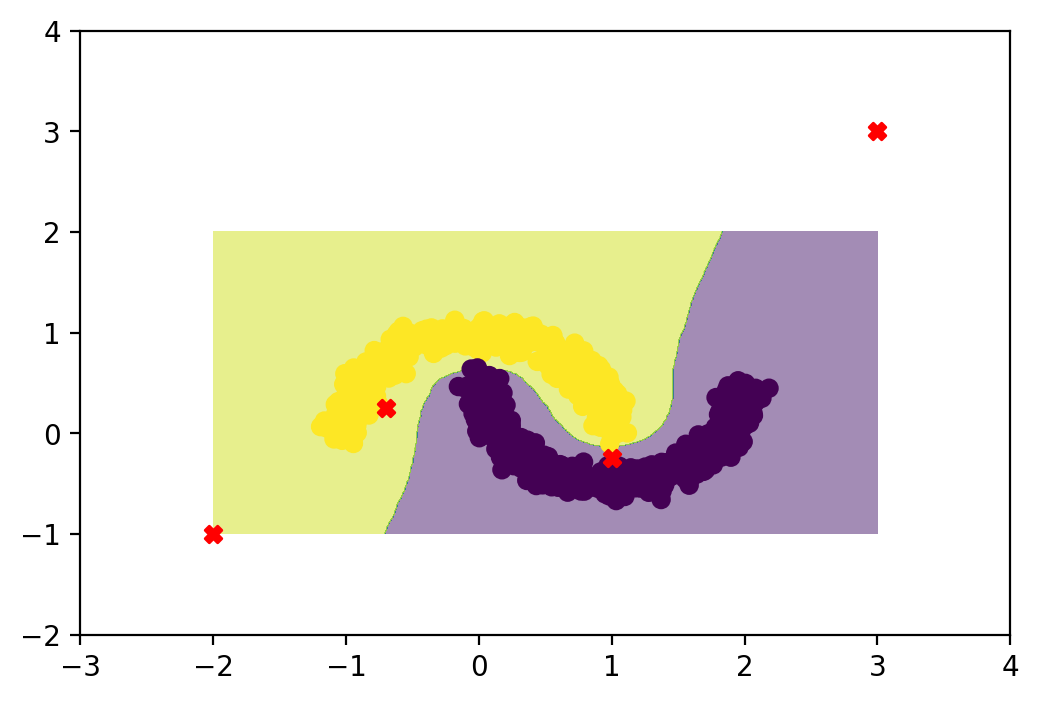

In [ ]:
X = np.linspace(-2,3,1000)
Y = np.linspace(-1,2,1000)
XX, YY = np.meshgrid(X,Y)
contour_X = np.c_[XX.reshape(-1,1),YY.reshape(-1,1)]
contour_result = knn_clf.predict(contour_X)
plt.figure(dpi=200)
plt.contourf(XX,YY,contour_result.reshape(1000,1000), cmap='viridis', alpha = 0.5)
plt.scatter(regular_data_highE[:,0], regular_data_highE[:,1], c = regular_labels_highE, cmap= 'viridis')
plt.scatter(X_new[:,0], X_new[:,1], c = 'r', marker= 'X')
plt.xlim(-3,4)
plt.ylim(-2,4)
plt.show()

#We create a contour plot as usual and mark all the new points, showing the anomalies as well

In [ ]:
blob_data, blob_targets = sklearn.datasets.make_blobs(n_samples=400, n_features=2,centers=5, random_state=50)

#Our next model is Gaussian Mixtures, which helps fit data to different gaussian mixtures
#We generate blob data for showing this model

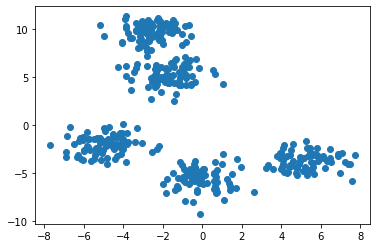

In [ ]:
plt.scatter(blob_data[:,0], blob_data[:,1])
plt.show()

#Visualizing

In [ ]:
gm = GaussianMixture(n_components=5, n_init=10)
gm.fit(blob_data)

#Fitting gaussian mixture models to this data 
#We must specify the number of gaussian mixtures

GaussianMixture(n_components=5, n_init=10)

In [ ]:
gm.means_

#We can see the positions of each of these models

array([[-4.97271883, -2.04310893],
       [-2.56441494,  9.74224174],
       [ 5.24110586, -3.69256662],
       [-0.07787179, -5.5670344 ],
       [-1.70812079,  5.25542775]])

In [ ]:
gm.converged_

True

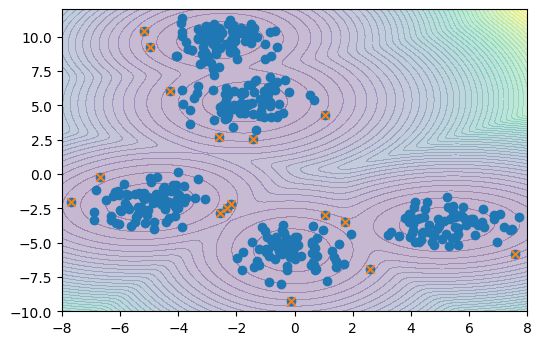

In [ ]:
X = np.linspace(-8,8,1000)
Y = np.linspace(-10,12,1000)
XX, YY = np.meshgrid(X,Y)
contour_X = np.c_[XX.reshape(-1,1),YY.reshape(-1,1)]
contour_result = -gm.score_samples(contour_X)
densities = gm.score_samples(blob_data)
density_threshold = np.percentile(densities, 4)
anomalies = blob_data[densities < density_threshold]
plt.figure(dpi=100)
plt.contourf(XX,YY,contour_result.reshape(1000,1000),50,cmap='viridis', alpha = 0.3)
plt.scatter(blob_data[:,0], blob_data[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], cmap= 'r', marker='x')
plt.show()

#We can use contour plots to visualize the Gaussian models in 2D
#We use the score_samples method to determine the densities that shall help us build the contour models
#We also want to determine the anomalies so we get the densities at the locations of the instances
#If the density is lower than a certain threshold set by selecting a percentile, then the point is an anomaly
#We can plot anomalies and mark them with a cross 'x'

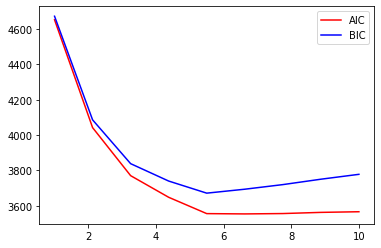

In [ ]:
AIC = []
BIC = []
values = np.linspace(1,10,9)

for i in range(1,10,1):
  gm = GaussianMixture(n_components=i, n_init=10)
  gm.fit(blob_data)
  AIC.append(gm.aic(blob_data))
  BIC.append(gm.bic(blob_data))

plt.plot(values, AIC,'r')
plt.plot(values, BIC,'b')
plt.legend(['AIC', 'BIC'])
plt.show()

#To select the optimal number of clusters we can use the AIC and BIC scores which are Information Criteria
#We can select the value that minimizes this criteria
#For the data we have used, 5 is the best value, and fits with what we have specified earlier

In [ ]:
bgmm = BayesianGaussianMixture(n_components=8, n_init=10, weight_concentration_prior=1000)
bgmm.fit(blob_data)

#Instead of selecting the number of clusters manually, we can use Bayesian Gaussian Mixtures 
#We set a number high enough and the model gives zero weight to the unecessary ones

BayesianGaussianMixture(n_components=8, n_init=10,
                        weight_concentration_prior=1000)

In [ ]:
np.round(bgmm.weights_,2)

#We can see the weights to all the 8 clusters
#In actual only 5 are there

array([0.22, 0.  , 0.2 , 0.18, 0.2 , 0.2 , 0.  , 0.  ])

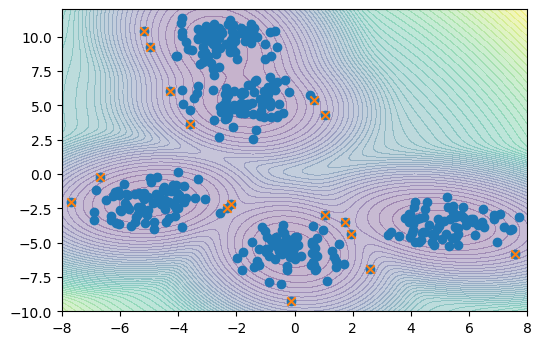

In [ ]:
X = np.linspace(-8,8,1000)
Y = np.linspace(-10,12,1000)
XX, YY = np.meshgrid(X,Y)
contour_X = np.c_[XX.reshape(-1,1),YY.reshape(-1,1)]
contour_result = -bgmm.score_samples(contour_X)
densities = bgmm.score_samples(blob_data)
density_threshold = np.percentile(densities, 4)
anomalies = blob_data[densities < density_threshold]
plt.figure(dpi=100)
plt.contourf(XX,YY,contour_result.reshape(1000,1000),50,cmap='viridis', alpha = 0.3)
plt.scatter(blob_data[:,0], blob_data[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], cmap= 'r', marker='x')
plt.show()

#Same process as earlier, visualizing contour plots and anomalies 
#We can see that the plots are similar and the optimal number of clusters have been determined